[[-1.63773872e-18]
 [-1.61662055e-17]]
[0.16507517 0.17773459]


ValueError: x and y must have same first dimension, but have shapes (4001,) and (1,)

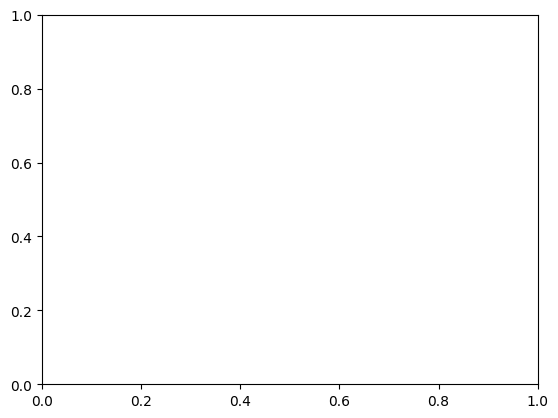

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.linalg import lu, solve_triangular, qr


#Grössen======================================================================================================================
H1=60
A1=0.05
L1=500

H2=45
A2=0.03
L2=2500

ro=1000
g=9.81
Zeta=0.002
p0=1e6
b= p0/2
tol = 1e-6

Pel= np.arange(0.2*1e6,1e6+200,200)

x0= np.array([0.1, 0.1])
#Funktionen=======================================================================================================================

def newton(x, Pel):

    def function(Iv):
        
        func = np.array([[p0 - a*(Iv[0])**2 - b*(Iv[0])**3-ro*g*H1-L1*Zeta*(ro/2)*(Iv[0]/A1)**2],
                         [p0 - a*(Iv[1])**2 - b*(Iv[1])**3-ro*g*H2-L2*Zeta*(ro/2)*(Iv[1]/A2)**2]])     
        return func 
    
    def jacobian(Iv): 

        Jaco =np.array([[- 2*a*(Iv[0]) - 3*b*(Iv[0])**2-2*L1*Zeta*(ro/2)*Iv[0]/(A1)**2,0],
                       [0,- 2*a*(Iv[1]) - 3*b*(Iv[1])**2-2*L2*Zeta*(ro/2)*Iv[1]/(A2)**2]])
        return Jaco

    length = len(Pel)
   
    Values_n = np.empty(length)
    n = 0
    q = 0
    w = 10
    i = 1
    for PelElement in Pel:
        a = (4 / 27) * (p0 ** 3) / ((((PelElement - 1e5)) ** 2) + 1e-10)

        res =  10
        res_k =  np.linalg.norm(function(x))

        while(10>i):
            A=jacobian(x)
            B=function(x)

            P,L,U =lu(A)

            #z = solve_triangular(L,P.T@B, lower=True)
            #delta = solve_triangular(U,z, lower=False)
            delta = np.linalg.solve(jacobian(x),function(x))
            x -= delta[:,0]
            i+=1
            res = np.linalg.norm(function(x))
            res = np.append(res_k,[res])

    xwerte = np.append([x[0]],
                       [x[1]])       
    maxN = max(Values_n)
    minN = min(Values_n)

    print(delta)
    return xwerte, maxN, minN


def wirk(): #n
    return ro*g*((H1+H2)/2)*Iv/Pel
#=======================================================================================================================



Iv, maxN, minI = newton( x0 , Pel)

print(Iv)

plt.plot(Pel,Iv[0], label='Arbeitspunkt')
#plt.plot(Pel,wirk(), label='Wirkungsgrad')
plt.legend()
plt.grid()
plt.xlabel('P elektrisch [W]')
plt.ylabel('Strömungsgeschwindigkeits [m/s]')
plt.show()